In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs) 
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

568

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities): # same thing as for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-bolsheretsk
City not found. Skipping...
Processing Record 2 of Set 1 | kavaratti
Processing Record 3 of Set 1 | filiatra
Processing Record 4 of Set 1 | saint george
Processing Record 5 of Set 1 | vestmannaeyjar
Processing Record 6 of Set 1 | marcona
City not found. Skipping...
Processing Record 7 of Set 1 | georgiyevka
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | san patricio
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | kampong thum
Processing Record 14 of Set 1 | viseu
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | hindang
Processing Record 17 of Set 1 | sadowara
City not found. Skipping...
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | quatre cocos
Processing Record 20 of Set 1 | busselton
Processing Recor

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavaratti,10.5669,72.6420,81.84,74,76,14.76,IN,2021-08-03 02:52:13
1,Filiatra,37.1500,21.5833,87.69,54,0,8.97,GR,2021-08-03 02:52:36
2,Saint George,37.1041,-113.5841,100.99,18,1,4.00,US,2021-08-03 02:51:02
3,Vestmannaeyjar,63.4427,-20.2734,52.54,83,100,5.77,IS,2021-08-03 02:51:27
4,Georgiyevka,43.0369,74.7114,71.64,49,75,4.47,KZ,2021-08-03 02:52:37
5,Rikitea,-23.1203,-134.9692,69.53,57,55,21.30,PF,2021-08-03 02:52:37
6,Port Elizabeth,-33.9180,25.5701,52.09,93,40,9.22,ZA,2021-08-03 02:51:45
7,Hobart,-42.8794,147.3294,56.12,67,40,1.01,AU,2021-08-03 02:51:34
8,San Patricio,28.0170,-97.5169,85.89,72,93,5.14,US,2021-08-03 02:51:40
9,Airai,-8.9266,125.4092,76.75,31,30,5.84,TL,2021-08-03 02:51:35


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kavaratti,IN,2021-08-03 02:52:13,10.5669,72.6420,81.84,74,76,14.76
1,Filiatra,GR,2021-08-03 02:52:36,37.1500,21.5833,87.69,54,0,8.97
2,Saint George,US,2021-08-03 02:51:02,37.1041,-113.5841,100.99,18,1,4.00
3,Vestmannaeyjar,IS,2021-08-03 02:51:27,63.4427,-20.2734,52.54,83,100,5.77
4,Georgiyevka,KZ,2021-08-03 02:52:37,43.0369,74.7114,71.64,49,75,4.47
5,Rikitea,PF,2021-08-03 02:52:37,-23.1203,-134.9692,69.53,57,55,21.30
6,Port Elizabeth,ZA,2021-08-03 02:51:45,-33.9180,25.5701,52.09,93,40,9.22
7,Hobart,AU,2021-08-03 02:51:34,-42.8794,147.3294,56.12,67,40,1.01
8,San Patricio,US,2021-08-03 02:51:40,28.0170,-97.5169,85.89,72,93,5.14
9,Airai,TL,2021-08-03 02:51:35,-8.9266,125.4092,76.75,31,30,5.84


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plotting Data

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

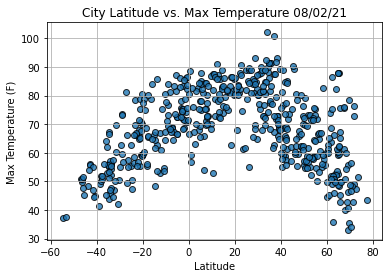

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

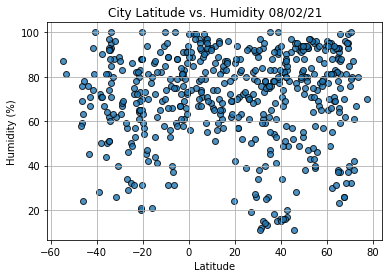

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

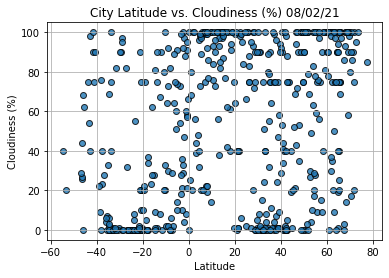

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

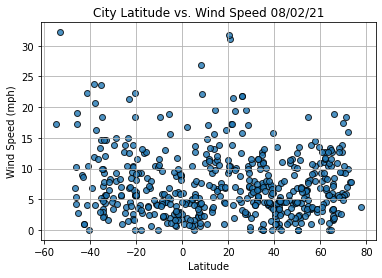

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()